In [1]:
import numpy as np
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings("ignore")
import cv2

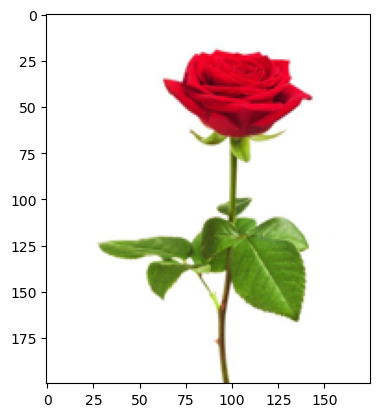

In [2]:
img_flower = cv2.imread('flower.png')
img_flower = cv2.cvtColor(img_flower, cv2.COLOR_BGR2RGB)
plt.imshow(img_flower);

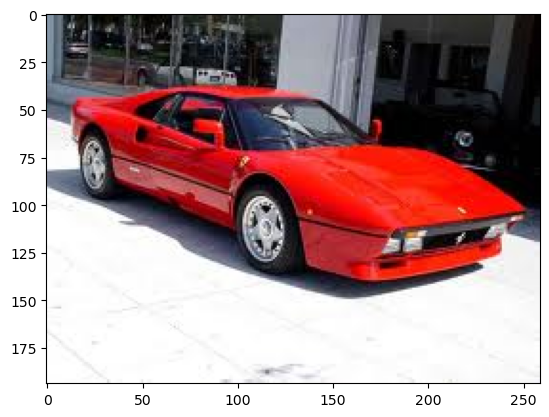

In [3]:
img_car = cv2.imread('car.png')
img_car = cv2.cvtColor(img_car, cv2.COLOR_BGR2RGB)
plt.imshow(img_car);

In [4]:
def Kmeans(data, K=3, centroids = [], max_iter=100):
    N = len(data)
    #print(N)
    classes = []
    centroids = np.array(centroids)
    new_centroids = centroids.copy()
    for iter in range(max_iter):

        distances = [np.linalg.norm(data-centroids[k],axis = 1) for k in range(K)] # claculate distance from each centroid to each datapoint
        #print(len(distances),len(distances[1]),len(distances[2]))
        classes = np.argmin(distances, axis=0)  # assign classes based on the distance claculated

        # for each class calculate the new centroids
        for k in range(K):
            if len(data[np.where(classes == k)]) == 0:
                continue
            new_centroids[k] = np.mean(data[np.where(classes == k)], axis=0)

        # if the centroids do not change stop iterating
        if (np.array(new_centroids) == np.array(centroids)).all():
            break

        # update the centroids
        centroids = new_centroids.copy()
    return classes, centroids


def Kmeans_segmentation(img, K=3, centroids=[], max_iter=100):
    classes, centroids = Kmeans(np.reshape(img, (-1,3)), K=K, centroids = centroids, max_iter=max_iter) # K-means on image with each RGB as a datapoint
    classes = np.reshape(classes, (np.shape(img)[0],np.shape(img)[1])) # reshape the classes calculated to the shape of the image
    segmented_img = np.zeros_like(img, dtype=float)
    for k in range(K):
        segmented_img[np.where(classes==k)] = centroids[k]
    cost = np.sum(np.linalg.norm(img-segmented_img, axis=2))
    return cost, np.int_(segmented_img)

In [5]:
init_centroids = [[255,0,0],[0,0,0],[255,255,255]]

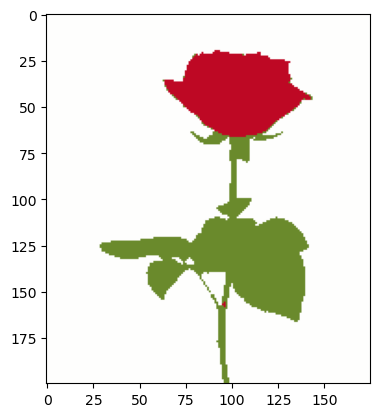

In [6]:
# Performing K-means on the flower image with the given centroids and dispalying results
cost, segmented_flower_img = Kmeans_segmentation(img_flower, centroids=init_centroids, max_iter=5)
plt.imshow(segmented_flower_img)
plt.show()

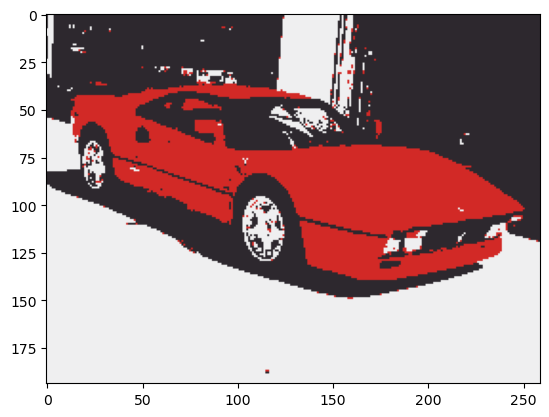

In [7]:
# Performing K-means on the car image with the given centroids and dispalying results
cost, segmented_car_img = Kmeans_segmentation(img_car, centroids=init_centroids, max_iter=5)
plt.imshow(segmented_car_img)
plt.show()

In [8]:
N = 30 # Number of times different k-means performed 
K = 3  # number of clusters
np.random.seed(5)
init_centroids = np.reshape(np.random.choice(256,3*K), (K,3)) # Calculating the random centroids

# Performing K-means on the flower image using the random cnetroid and dispalying results
cost1, segmented_flower_img = Kmeans_segmentation(img_flower, centroids=init_centroids, max_iter=5)

# Performing K-means on the car image using the random cnetroid and dispalying results
cost2, segmented_car_img = Kmeans_segmentation(img_car, centroids=init_centroids, max_iter=5)

mincost_flower_img = segmented_flower_img  # segmented flower image with lowest cost 
maxcost_flower_img = segmented_flower_img  # segmented flower image with highest cost
mincost_car_img = segmented_car_img       # segmented car image with lowest cost
maxcost_car_img = segmented_car_img       # segmented car image with highest cost

cmin_flower = cost1   # lowest cost of flower image
cmax_flower = cost1   # highest cost of flower image 
cmin_car = cost2      # lowest cost of car image
cmax_car = cost2      # highest cost of car image


for n in range(N-1):
    init_centroids = np.reshape(np.random.choice(256,3*K), (K,3)) # Calculating the random centroids
    cost1, segmented_flower_img = Kmeans_segmentation(img_flower, centroids=init_centroids, max_iter=5) # Performing K-means on the flower image using the random cnetroid and dispalying results
    cost2, segmented_car_img = Kmeans_segmentation(img_car, centroids=init_centroids, max_iter=5)  # Performing K-means on the car image using the random cnetroid and dispalying results

    # Updating min cost and max cost of the flower image and car image
    if cost1 < cmin_flower:
        cmin_flower = cost1
        mincost_flower_img = segmented_flower_img  
    elif cost1 > cmax_flower:
        cmax_flower = cost1
        maxcost_flower_img = segmented_flower_img
    if cost2 < cmin_car:
        cmin_car = cost2
        mincost_car_img = segmented_car_img  
    elif cost2 > cmax_car:
        cmax_car = cost2
        maxcost_car_img = segmented_car_img



Text(0.5, 1.0, 'Maximum Cost Images')

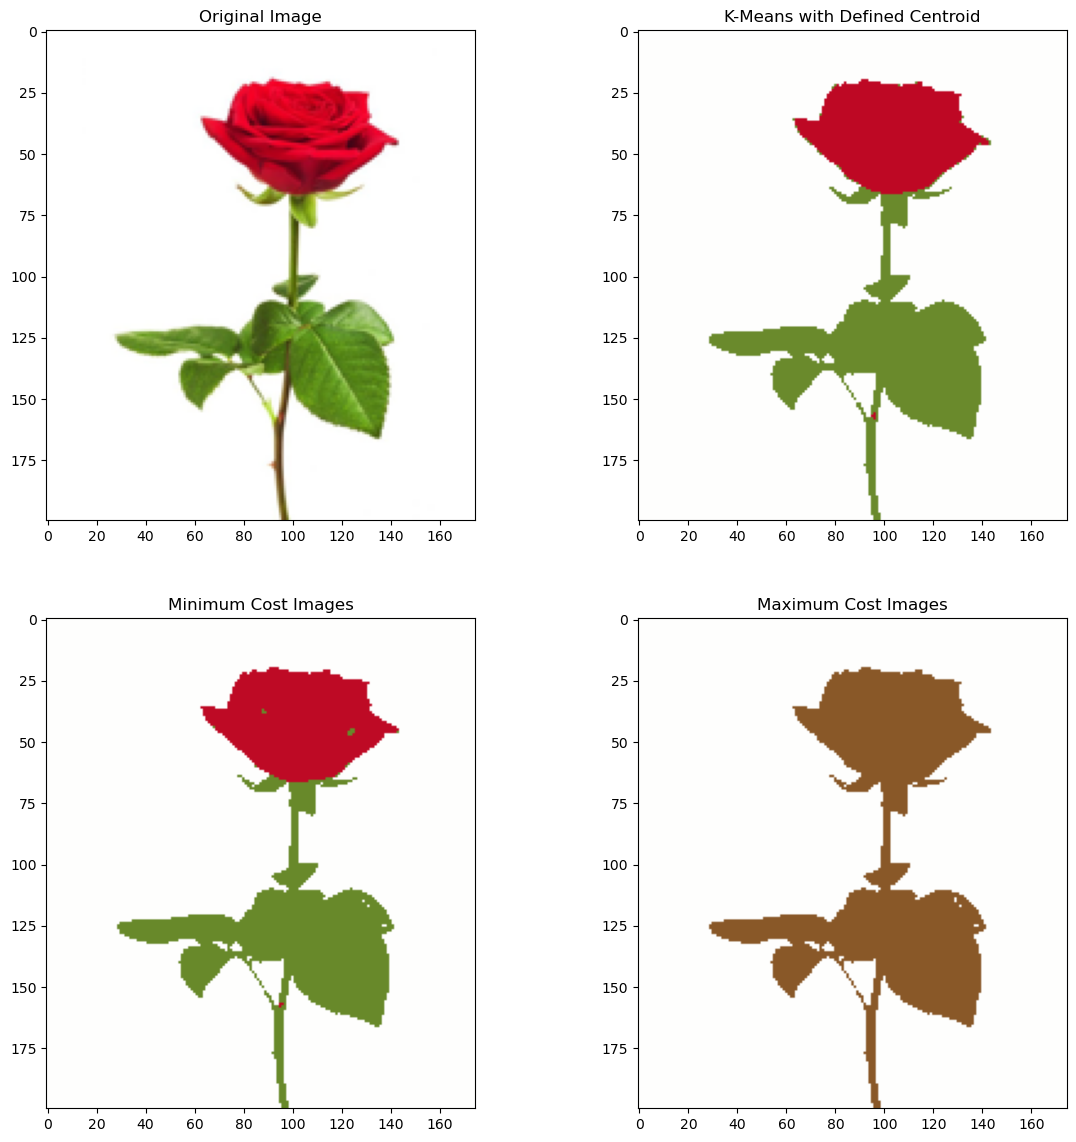

In [9]:
plt.figure(figsize=[14,14])
plt.subplot(221)
plt.imshow(img_flower)
plt.title("Original Image")
plt.subplot(222)
plt.imshow(segmented_flower_img)
plt.title("K-Means with Defined Centroid")
plt.subplot(223)
plt.imshow(mincost_flower_img)
plt.title("Minimum Cost Images")
plt.subplot(224)
plt.imshow(maxcost_flower_img)
plt.title("Maximum Cost Images")

Text(0.5, 1.0, 'Maximum Cost Images')

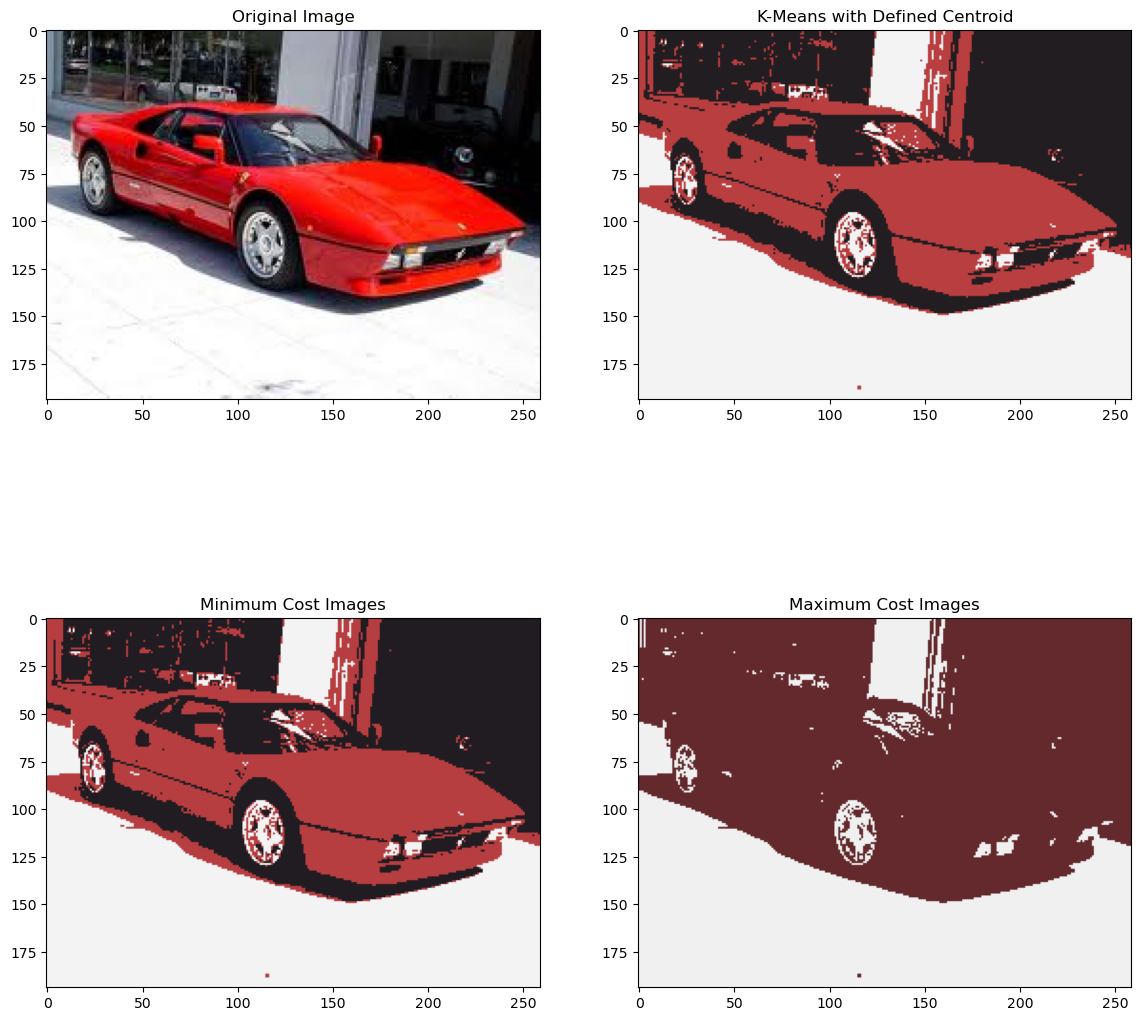

In [10]:
plt.figure(figsize=[14,14])
plt.subplot(221)
plt.imshow(img_car)
plt.title("Original Image")
plt.subplot(222)
plt.imshow(segmented_car_img)
plt.title("K-Means with Defined Centroid")
plt.subplot(223)
plt.imshow(mincost_car_img)
plt.title("Minimum Cost Images")
plt.subplot(224)
plt.imshow(maxcost_car_img)
plt.title("Maximum Cost Images")

Comments and observations

*   The minimum cost segementation of the car and flower image are better visually than corresponding maximum cost segmentation of the images
*   The segmented car image with the given centroids looks visually better than the minimum cost segmented car image with random intialization , this might be because of less numbers of samples

In [11]:
N = 300 # Number of times different k-means performed 
K = 3  # number of clusters
np.random.seed(5)
init_centroids = np.reshape(np.random.choice(256,3*K), (K,3)) # Calculating the random centroids

# Performing K-means on the flower image using the random cnetroid and dispalying results
cost1, segmented_flower_img = Kmeans_segmentation(img_flower, centroids=init_centroids, max_iter=5)

# Performing K-means on the car image using the random cnetroid and dispalying results
cost2, segmented_car_img = Kmeans_segmentation(img_car, centroids=init_centroids, max_iter=5)

mincost_flower_img = segmented_flower_img  # segmented flower image with lowest cost 
maxcost_flower_img = segmented_flower_img  # segmented flower image with highest cost
mincost_car_img = segmented_car_img       # segmented car image with lowest cost
maxcost_car_img = segmented_car_img       # segmented car image with highest cost

cmin_flower = cost1   # lowest cost of flower image
cmax_flower = cost1   # highest cost of flower image 
cmin_car = cost2      # lowest cost of car image
cmax_car = cost2      # highest cost of car image


for n in range(N-1):
    init_centroids = np.reshape(np.random.choice(256,3*K), (K,3)) # Calculating the random centroids
    cost1, segmented_flower_img = Kmeans_segmentation(img_flower, centroids=init_centroids, max_iter=5) # Performing K-means on the flower image using the random cnetroid and dispalying results
    cost2, segmented_car_img = Kmeans_segmentation(img_car, centroids=init_centroids, max_iter=5)  # Performing K-means on the car image using the random cnetroid and dispalying results

    # Updating min cost and max cost of the flower image and car image
    if cost1 < cmin_flower:
        cmin_flower = cost1
        mincost_flower_img = segmented_flower_img  
    elif cost1 > cmax_flower:
        cmax_flower = cost1
        maxcost_flower_img = segmented_flower_img
    if cost2 < cmin_car:
        cmin_car = cost2
        mincost_car_img = segmented_car_img  
    elif cost2 > cmax_car:
        cmax_car = cost2
        maxcost_car_img = segmented_car_img



In [12]:
init_centroids = np.reshape(np.random.choice(256,3*K), (K,3)) # Calculating the random centroids
# Performing K-means on the flower image using the random cnetroid and dispalying results
cost1, segmented_flower_img = Kmeans_segmentation(img_flower, centroids=init_centroids, max_iter=5)

# Performing K-means on the car image using the random cnetroid and dispalying results
cost2, segmented_car_img = Kmeans_segmentation(img_car, centroids=init_centroids, max_iter=5)

Text(0.5, 1.0, 'Maximum Cost Images')

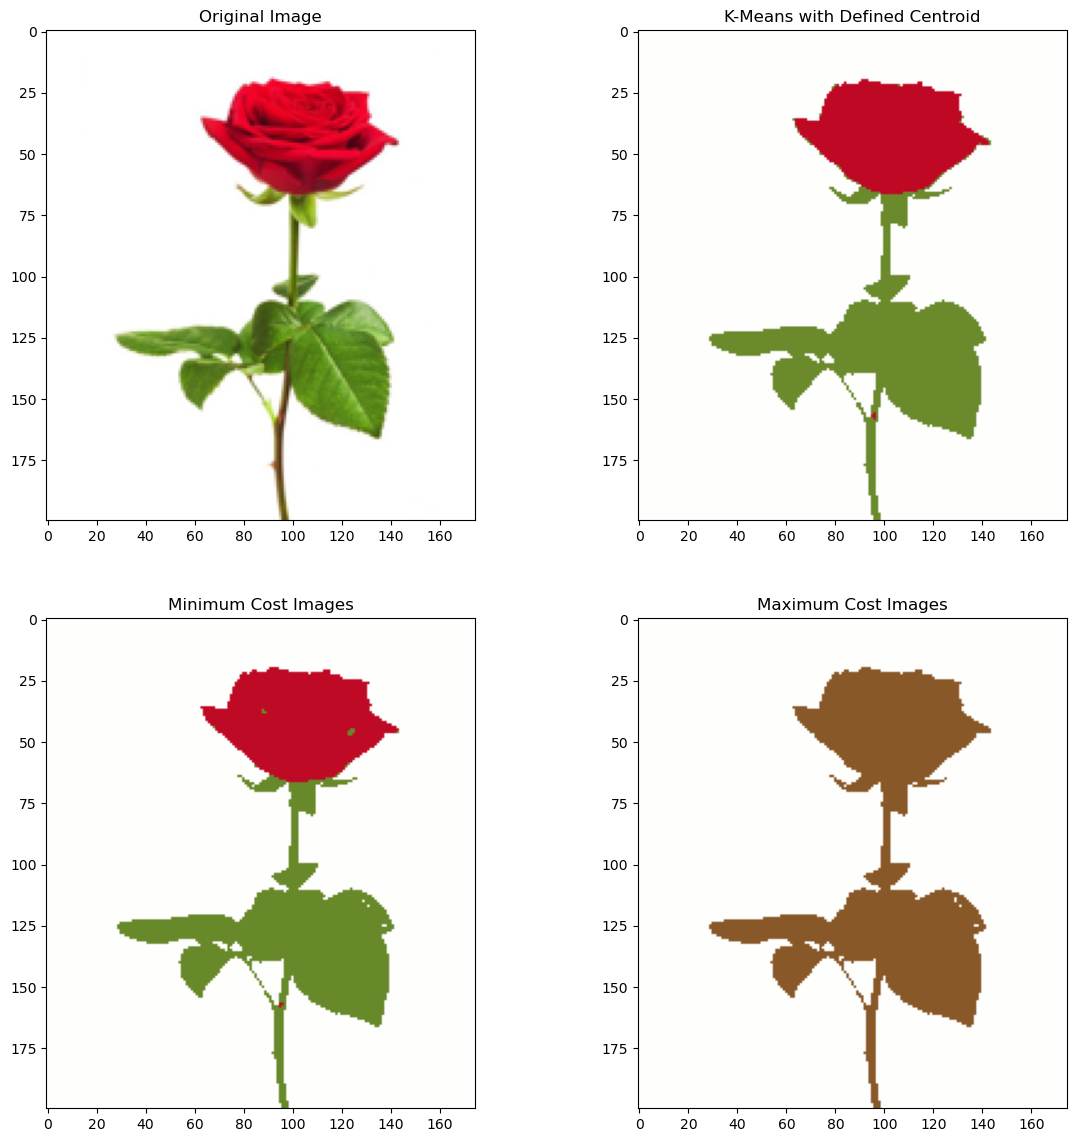

In [13]:
plt.figure(figsize=[14,14])
plt.subplot(221)
plt.imshow(img_flower)
plt.title("Original Image")
plt.subplot(222)
plt.imshow(segmented_flower_img)
plt.title("K-Means with Defined Centroid")
plt.subplot(223)
plt.imshow(mincost_flower_img)
plt.title("Minimum Cost Images")
plt.subplot(224)
plt.imshow(maxcost_flower_img)
plt.title("Maximum Cost Images")

Text(0.5, 1.0, 'Maximum Cost Images')

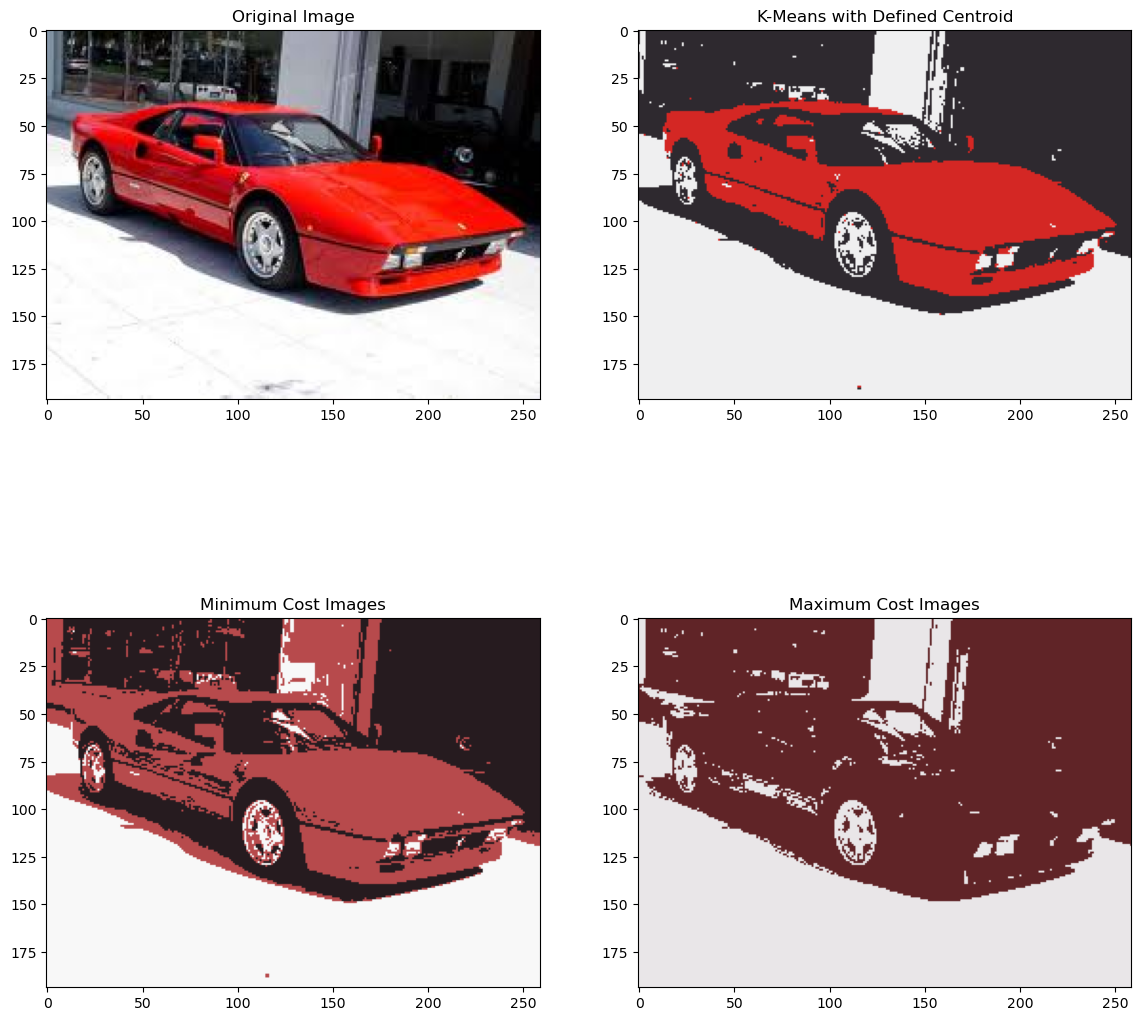

In [14]:
plt.figure(figsize=[14,14])
plt.subplot(221)
plt.imshow(img_car)
plt.title("Original Image")
plt.subplot(222)
plt.imshow(segmented_car_img)
plt.title("K-Means with Defined Centroid")
plt.subplot(223)
plt.imshow(mincost_car_img)
plt.title("Minimum Cost Images")
plt.subplot(224)
plt.imshow(maxcost_car_img)
plt.title("Maximum Cost Images")